In [1]:
import nltk
from nltk.corpus import reuters
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
import string
from nltk.corpus import stopwords

In [2]:
# We'll use the reuters corpus in NLTK.
# The same steps of preprocessing can be done on documents read in from external files.

# How many files are there in the corpus?
# What are their categories? Single or multiple categories for one file?
len(reuters.fileids())

10788

In [3]:
cats = [ reuters.categories(f) for f in reuters.fileids() ]

In [4]:
cats

[['trade'],
 ['grain'],
 ['crude', 'nat-gas'],
 ['corn', 'grain', 'rice', 'rubber', 'sugar', 'tin', 'trade'],
 ['palm-oil', 'veg-oil'],
 ['ship'],
 ['coffee', 'lumber', 'palm-oil', 'rubber', 'veg-oil'],
 ['grain', 'wheat'],
 ['gold'],
 ['acq'],
 ['tin'],
 ['interest', 'money-fx'],
 ['acq', 'copper'],
 ['ipi'],
 ['carcass',
  'corn',
  'grain',
  'livestock',
  'oilseed',
  'rice',
  'soybean',
  'trade'],
 ['earn'],
 ['earn'],
 ['interest', 'money-fx'],
 ['bop', 'trade'],
 ['gas', 'lead'],
 ['acq'],
 ['jobs'],
 ['earn'],
 ['earn'],
 ['earn'],
 ['earn'],
 ['tin'],
 ['trade'],
 ['zinc'],
 ['sugar'],
 ['sugar'],
 ['acq'],
 ['interest', 'money-fx'],
 ['cpi', 'gnp'],
 ['oilseed', 'palm-oil', 'soy-oil', 'soybean', 'veg-oil'],
 ['earn'],
 ['acq'],
 ['earn'],
 ['trade'],
 ['acq'],
 ['acq'],
 ['earn'],
 ['trade'],
 ['dlr', 'money-fx', 'yen'],
 ['cpi'],
 ['interest', 'money-fx'],
 ['acq'],
 ['sugar'],
 ['sugar'],
 ['earn'],
 ['nickel'],
 ['earn'],
 ['dlr', 'money-fx'],
 ['acq'],
 ['earn'],
 ['ea

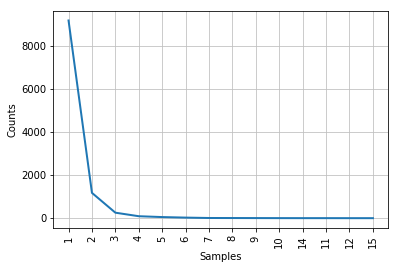

In [5]:
cat_num = [ len(c) for c in cats ]
fd_num = FreqDist(cat_num)
fd_num.plot()

In [6]:
# How many documents are there in each category?
# FreqDist() can be used to find the answer, but we need to flatten the list of categories first.
cats_flat = [ c for l in cats for c in l ]

In [7]:
fd_cat = FreqDist(cats_flat)
fd_cat

FreqDist({'acq': 2369,
          'alum': 58,
          'barley': 51,
          'bop': 105,
          'carcass': 68,
          'castor-oil': 2,
          'cocoa': 73,
          'coconut': 6,
          'coconut-oil': 7,
          'coffee': 139,
          'copper': 65,
          'copra-cake': 3,
          'corn': 237,
          'cotton': 59,
          'cotton-oil': 3,
          'cpi': 97,
          'cpu': 4,
          'crude': 578,
          'dfl': 3,
          'dlr': 175,
          'dmk': 14,
          'earn': 3964,
          'fuel': 23,
          'gas': 54,
          'gnp': 136,
          'gold': 124,
          'grain': 582,
          'groundnut': 9,
          'groundnut-oil': 2,
          'heat': 19,
          'hog': 22,
          'housing': 20,
          'income': 16,
          'instal-debt': 6,
          'interest': 478,
          'ipi': 53,
          'iron-steel': 54,
          'jet': 5,
          'jobs': 67,
          'l-cattle': 8,
          'lead': 29,
          'lei': 15,
      

In [8]:
fd_cat.most_common(20)

[('earn', 3964),
 ('acq', 2369),
 ('money-fx', 717),
 ('grain', 582),
 ('crude', 578),
 ('trade', 485),
 ('interest', 478),
 ('ship', 286),
 ('wheat', 283),
 ('corn', 237),
 ('dlr', 175),
 ('money-supply', 174),
 ('oilseed', 171),
 ('sugar', 162),
 ('coffee', 139),
 ('gnp', 136),
 ('veg-oil', 124),
 ('gold', 124),
 ('soybean', 111),
 ('nat-gas', 105)]

In [9]:
# Let's pick two categories and visualize the articles in each category using word cloud
grain = reuters.fileids('grain')

In [10]:
trade = reuters.fileids('trade')

In [11]:
grain_tok = [ reuters.words(f) for f in grain ]

In [13]:
trade_tok = [ reuters.words(f) for f in trade ] 

In [14]:
#Let's define a function preprocess() to perform the preprocessing steps given a file (token list):
#   punctuation removal, case lowering, stopword removal, 
#   stemming/lemmatization, further cleaning
stop = stopwords.words('english')
snowball = nltk.SnowballStemmer('english')
#wnl = nltk.WordNetLemmatizer()

In [15]:
def preprocess(toks):
    toks = [ t.lower() for t in toks if t not in string.punctuation ]
    toks = [t for t in toks if t not in stop ]
    
    ##dont do this for pos tagging
#    toks = [ snowball.stem(t) for t in toks ]
    
#    toks = [ wnl.lemmatize(t) for t in toks ]
    toks_clean = [ t for t in toks if len(t) >= 3 ]
    return toks_clean

In [16]:
# Preprocess each file in each category
grain_clean = [ preprocess(f) for f in grain_tok ]
trade_clean = [ preprocess(f) for f in trade_tok ]

In [17]:
# Flatten the list of lists for FreqDist
grain_flat = [ c for l in grain_clean for c in l ]
trade_flat = [ c for l in trade_clean for c in l ]

In [20]:
grain_pos = pos_tag(grain_flat, tagset= 'universal')
grain_pos

[('china', 'NOUN'),
 ('daily', 'ADV'),
 ('says', 'VERB'),
 ('vermin', 'NOUN'),
 ('eat', 'NOUN'),
 ('pct', 'NOUN'),
 ('grain', 'NOUN'),
 ('stocks', 'NOUN'),
 ('survey', 'NOUN'),
 ('provinces', 'NOUN'),
 ('seven', 'NUM'),
 ('cities', 'NOUN'),
 ('showed', 'VERB'),
 ('vermin', 'ADJ'),
 ('consume', 'ADJ'),
 ('seven', 'NUM'),
 ('pct', 'ADJ'),
 ('china', 'NOUN'),
 ('grain', 'VERB'),
 ('stocks', 'NOUN'),
 ('china', 'VERB'),
 ('daily', 'ADV'),
 ('said', 'VERB'),
 ('also', 'ADV'),
 ('said', 'VERB'),
 ('year', 'NOUN'),
 ('575', 'NUM'),
 ('mln', 'NOUN'),
 ('tonnes', 'NOUN'),
 ('pct', 'VERB'),
 ('china', 'ADJ'),
 ('fruit', 'NOUN'),
 ('output', 'NOUN'),
 ('left', 'VERB'),
 ('rot', 'ADJ'),
 ('mln', 'NOUN'),
 ('tonnes', 'NOUN'),
 ('pct', 'VERB'),
 ('vegetables', 'NOUN'),
 ('paper', 'NOUN'),
 ('blamed', 'VERB'),
 ('waste', 'NOUN'),
 ('inadequate', 'ADJ'),
 ('storage', 'NOUN'),
 ('bad', 'ADJ'),
 ('preservation', 'NOUN'),
 ('methods', 'NOUN'),
 ('said', 'VERB'),
 ('government', 'NOUN'),
 ('launched', 'VE

In [26]:
fd_grain = FreqDist(grain_flat)
fd_grain

FreqDist({'china': 155,
          'daily': 42,
          'says': 34,
          'vermin': 2,
          'eat': 3,
          'pct': 473,
          'grain': 644,
          'stocks': 146,
          'survey': 10,
          'provinces': 19,
          'seven': 43,
          'cities': 4,
          'showed': 11,
          'consume': 1,
          'said': 1806,
          'also': 160,
          'year': 473,
          '575': 3,
          'mln': 1082,
          'tonnes': 1193,
          'fruit': 2,
          'output': 83,
          'left': 14,
          'rot': 2,
          'vegetables': 4,
          'paper': 21,
          'blamed': 1,
          'waste': 5,
          'inadequate': 5,
          'storage': 36,
          'bad': 7,
          'preservation': 2,
          'methods': 3,
          'government': 165,
          'launched': 4,
          'national': 62,
          'programme': 5,
          'reduce': 33,
          'calling': 1,
          'improved': 20,
          'technology': 5,
          'greater

In [28]:
fd_trade = FreqDist(trade_flat)
fd_trade

FreqDist({'asian': 18,
          'exporters': 31,
          'fear': 6,
          'damage': 8,
          'japan': 819,
          'rift': 1,
          'mounting': 7,
          'trade': 2034,
          'friction': 20,
          'raised': 9,
          'fears': 5,
          'among': 37,
          'many': 48,
          'asia': 12,
          'exporting': 9,
          'nations': 119,
          'row': 26,
          'could': 172,
          'inflict': 1,
          'far': 35,
          'reaching': 7,
          'economic': 241,
          'businessmen': 27,
          'officials': 250,
          'said': 2181,
          'told': 244,
          'reuter': 7,
          'correspondents': 2,
          'capitals': 3,
          'move': 44,
          'might': 43,
          'boost': 41,
          'protectionist': 63,
          'sentiment': 16,
          'lead': 30,
          'curbs': 30,
          'american': 99,
          'imports': 348,
          'products': 155,
          'conflict': 13,
          'would': 6

In [29]:
# Generate word clouds for the two categories.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

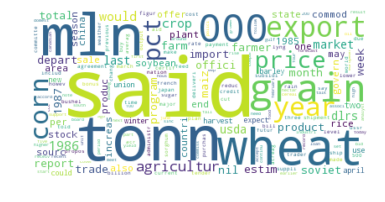

In [28]:
wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()

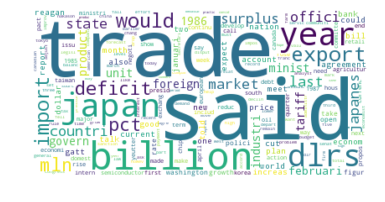

In [29]:
wc_trade = WordCloud(background_color="white").generate_from_frequencies(fd_trade)
plt.imshow(wc_trade, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Finally, how to generate TDM

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
# sklearn requires the input to be text string
grain_text = [ ' '.join(f) for f in grain_clean ]
grain_text

['china daili say vermin eat pct grain stock survey provinc seven citi show vermin consum seven pct china grain stock china daili said also said year 575 mln tonn pct china fruit output left rot mln tonn pct veget paper blame wast inadequ storag bad preserv method said govern launch nation programm reduc wast call improv technolog storag preserv greater product addit paper gave detail',
 'thai trade deficit widen first quarter thailand trade deficit widen billion baht first quarter 1987 billion year ago busi econom depart said said janunari march import rose billion baht billion thailand improv busi climat year result pct increas import raw materi semi finish product countri oil import bill howev fell pct first quarter due lower oil price depart said first quarter export expand billion baht billion export growth smaller expect due lower earn mani key commod includ rice whose earn declin pct maiz pct sugar pct tin pct can pineappl seven pct product regist high export growth jewelleri pc

In [35]:
# Create a matrix using term frequency first using CountVectorizer
# The result is in sparse matrix format
vec_tf = CountVectorizer()
vec_tf

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
grain_tf = vec_tf.fit_transform(grain_text)
grain_tf

<582x4816 sparse matrix of type '<class 'numpy.int64'>'
	with 36794 stored elements in Compressed Sparse Row format>

In [37]:
# Where are the columns and rows then?
vec_tf.get_feature_names()
grain_tf_m = grain_tf.toarray()

In [38]:
vec_tf_2 = CountVectorizer(min_df = 2)
grain_tf_2 = vec_tf_2.fit_transform(grain_text)
grain_tf_2

<582x2847 sparse matrix of type '<class 'numpy.int64'>'
	with 34825 stored elements in Compressed Sparse Row format>

In [32]:
# To have binary indexing, set "binary=True"
vec_bin = CountVectorizer(binary=True)
grain_bin = vec_bin.fit_transform(grain_text)
grain_bin.toarray()[:10]

# And tfidf indexing
vec_tfidf = TfidfVectorizer(min_df = 2)
grain_tfidf = vec_tfidf.fit_transform(grain_text)
grain_tfidf
grain_tfidf.toarray()[:10]

# To save the vectorized results for future use
import pickle
pickle.dump(grain_tfidf, open("tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("feature.pkl","wb"))
#load the content
loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))
tfidf = pickle.load(open("tfidf.pkl", "rb" ) )
tfidf

<582x2847 sparse matrix of type '<class 'numpy.float64'>'
	with 34825 stored elements in Compressed Sparse Row format>